# Warburg Analysis


Analyzing the impact of pWarburgSwitch and minimumOxygenConcentration on tumour growth.

Looking at metrics experiments run with pWarburgSwitch 5%, 13%, 20%, 40%, 80% (5 probabilities)

For minimumOxygenConcentration of: 12, 15, 18 (3 thresholds)


In [1]:
import pandas as pd
from IPython.core.display import HTML
import json

with open("../config.json", "r") as f:
    config = json.load(f)
    f.close()

data = pd.read_csv("../{0}/{1}".format(config["analysis_dir"], config["mean_error_csv"]))
data["ame"] = pd.to_numeric(data["ame"])
data_grouped = data.groupby(["minimumOxygenConcentration", "pWarburgSwitch"])
mean_errors = pd.DataFrame(data_grouped.mean()["ame"])
print(display(HTML(mean_errors.to_html())))
counts = pd.DataFrame(data_grouped.count().rename(columns={"ame":"count"})["count"])
print(display(HTML(counts.to_html())))


None


None


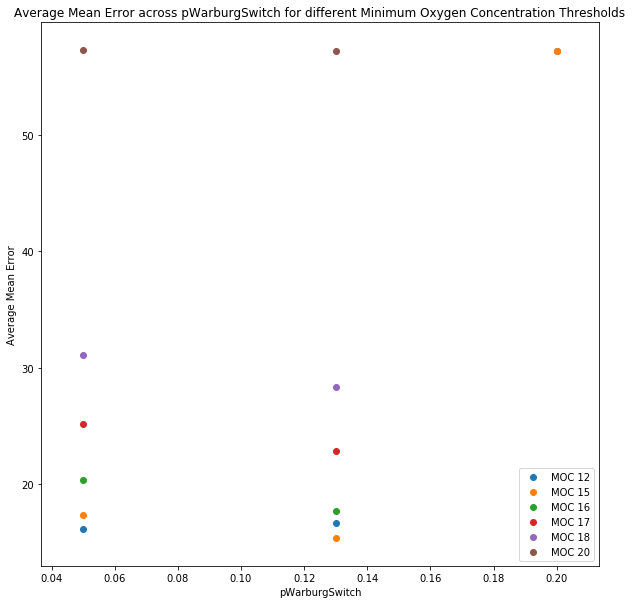

In [2]:
mocs = mean_errors.index.levels[0]
pwss = mean_errors.index.levels[1]
from pandas.core.common import flatten
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title("Average Mean Error across pWarburgSwitch for different Minimum Oxygen Concentration Thresholds")
plt.xlabel("pWarburgSwitch")
plt.ylabel("Average Mean Error")

legend_template = "MOC %s"

for moc in mocs:
    mocData = mean_errors.loc[[moc]]    
    mes = list(flatten(mocData.values))
    plt.scatter(pwss[0:len(mes)], mes, label=legend_template % str(moc))
    
plt.legend()
plt.show()
    

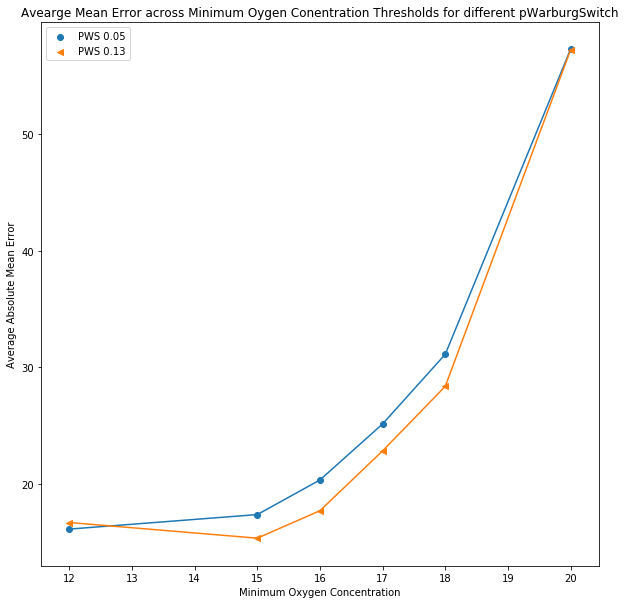

In [3]:
plt.figure(figsize=(10,10))

plt.title("Avearge Mean Error across Minimum Oygen Conentration Thresholds for different pWarburgSwitch")
plt.xlabel("Minimum Oxygen Concentration")
plt.ylabel("Average Absolute Mean Error")

legend_template = "PWS %s"

markers = ['o', '<', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
for c,pws in enumerate(pwss):
    try:
        pwsMEs = list(flatten([mean_errors.loc[[(i, pws)]].values for i in mocs]))
        plt.scatter(mocs, pwsMEs, label=legend_template % str(pws), marker=markers[c])
        plt.plot(mocs, pwsMEs)
    except:
        pass
    
plt.legend()
plt.show()

## Direction of Error

In [4]:
errorSeries = pd.read_csv("../{0}/{1}".format(config["analysis_dir"], config["error_series_csv"])) 

columns = errorSeries.columns.values
epoch_indexes = [i for i, v in enumerate(columns) if "epoch" in v]

for i in epoch_indexes:
    errorSeries.iloc[:,i] = pd.to_numeric(errorSeries.iloc[:,i])
    
errorSeriesGrouped = errorSeries.groupby(["minimumOxygenConcentration", "pWarburgSwitch"])
mean_errors = pd.DataFrame(errorSeriesGrouped.mean())
display(HTML(mean_errors.to_html()))

errorSeriesCount = errorSeriesGrouped.count()[["name"]]
display(HTML(errorSeriesCount.to_html()))

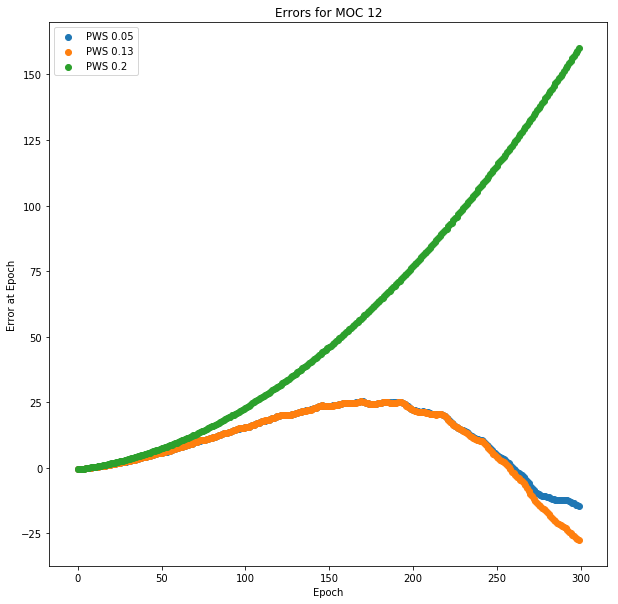

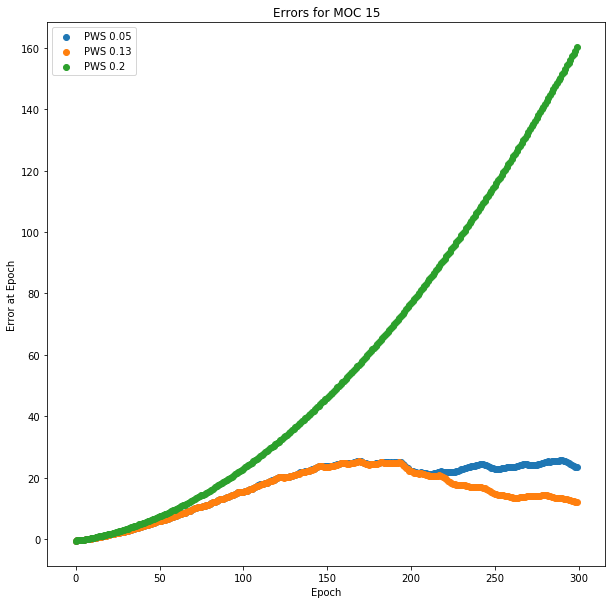

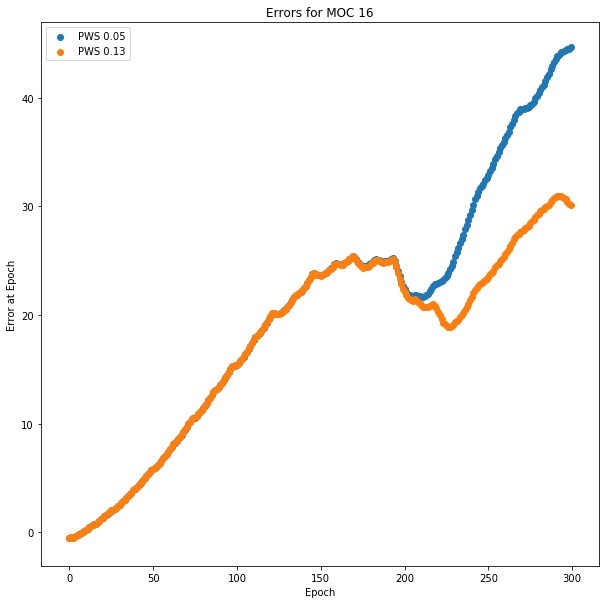

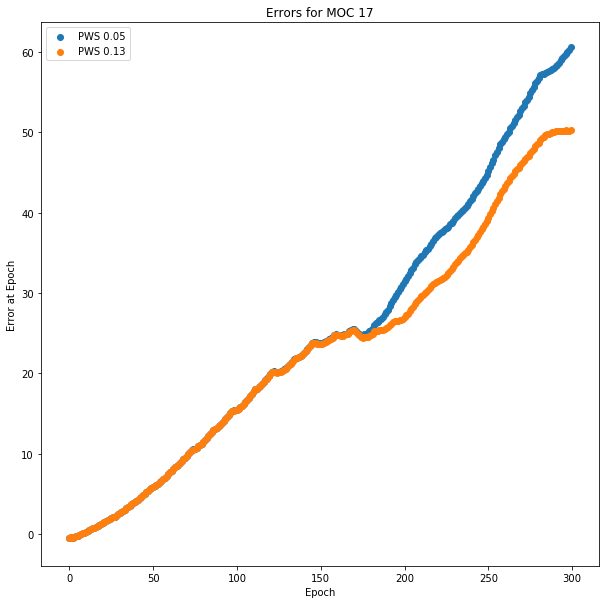

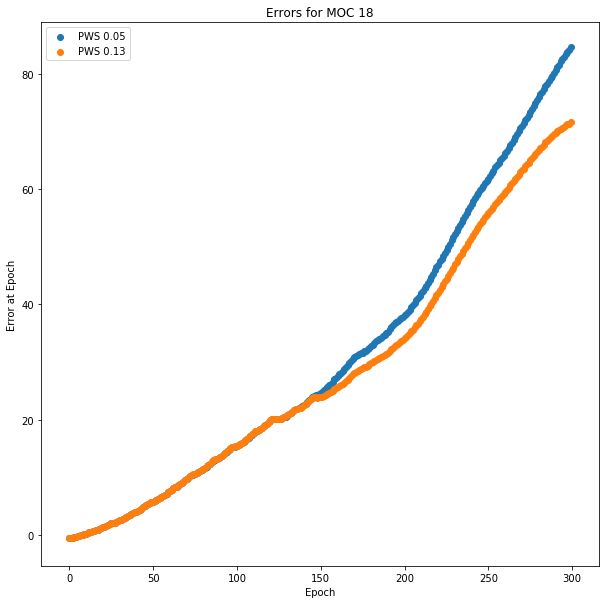

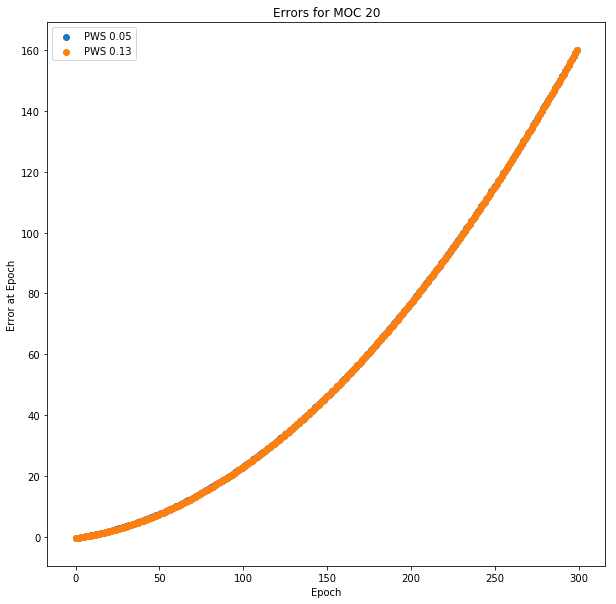

In [5]:

for moc in mocs:
    plt.figure(figsize=(10,10))
    for pws in pwss:
        try:
            row = mean_errors.loc[[(moc,pws)]]
            epoch_indexes_for_row = [i for i, v in enumerate(row.columns.values) if "epoch" in v]
            row = row.iloc[:, epoch_indexes_for_row]
            plt.scatter(range(len(epoch_indexes_for_row)), row, label="PWS %s" % str(pws))
        except:
            pass
    plt.xlabel("Epoch")
    plt.ylabel("Error at Epoch")
    plt.title("Errors for MOC %s" % str(moc))
    plt.legend()
    plt.show()
        